In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime


In [3]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//Scenario7_MC-9K
workdir = "path" 
dataset = np.load(workdir + "//MC9k_190507_ccle_cell_gdsc_mut_drug_vali_for_aron.npz") # input file
ss0 = np.load(workdir + '//MC9k_190507_shuffle_split_ccle_cell_gdsc_mut_r0_9_1.npz') # split for training and test

In [4]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [5]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [6]:
# In[15]:
ab =[]
for i in range(50,100):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

1 1


In [7]:
x.shape

(8727, 21213)

In [8]:
training_image_array.shape

(7855, 21213)

In [9]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [10]:
# train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
# test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
# #input_shape = (img_rows, img_cols, 1)

In [11]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(7855, 21213) (7855,) (872, 21213) (872,)


In [12]:
train_X = np.nan_to_num(train_X)
test_X = np.nan_to_num(test_X)

In [13]:
inds = np.where(np.isnan(test_X))

In [14]:
inds

(array([], dtype=int64), array([], dtype=int64))

In [15]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (7855, 21213)
7855 train samples
872 test samples


In [16]:
# Model fitting
from sklearn.svm import SVR
StartTime8 = datetime.now()
print("StartTime :", StartTime8)
# #############################################################################
# Fit regression model
svr_lin = SVR(C=0.01)
y_lin = svr_lin.fit(train_X, train_y).predict(test_X)
EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2020-02-12 12:24:12.203096
EndTime : 2020-02-12 12:50:18.853811


In [17]:
# Save model
import pickle
from sklearn.externals import joblib
workdir = "D://DrugResponsivenessGuideline_log//Result//MC-9K//SVR"
joblib.dump(svr_lin, workdir + '//MC_9K_SVR_model.pkl') 


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['D://DrugResponsivenessGuideline_log//Result//MC-9K//SVR//MC_9K_SVR_model.pkl']

In [18]:
import matplotlib
from matplotlib import pyplot as plt

In [19]:
a = pd.DataFrame(y_lin)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

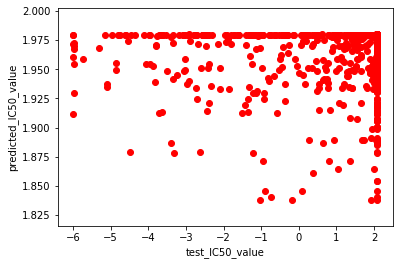

In [20]:
# scatter plot
plt.scatter(test_label_array,y_lin,c='red')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//191205_MC_9K_SVR_scatter_plot.png')

In [21]:
# RMSE
rse = ((test_label_array-y_lin)**2).sum()
mse = np.mean((test_label_array-y_lin)**2)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 2.174467241346202


In [22]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.0008564445987595652, intercept=1.9616771617988302, rvalue=0.05949699471511963, pvalue=0.07909511190502934, stderr=0.0004871633154855671)

In [ ]:
# R-squared value

from sklearn.metrics import r2_score
r2_value = r2_score(b, a) 
print(r2_value)